# Importing libraries

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import ascii 
from scipy.optimize import curve_fit

# Loading the data 

In [6]:
# Loading data from 55cnc

data = ascii.read('55cnc.txt')

# Extracting time, radial velocity, and uncertainty

time = data['HJD']
rv = data['Radial_Velocity']
uncertainty = data['Radial_Velocity_Uncertainty']



# Defining the Oscillatory Function 

In [7]:
# Defining the oscillatory model function

def oscillatory_model(t, A, B, C, D):
    return A * np.sin(B * (t - C)) + D

# Fitting the model to the data using *curve_fit*

In [10]:
# Initial Guesses for the parameters

A_guess = 136.0       # Amplitude (m/s)
B_guess = 0.00314     # Frequency
C_guess = 0           # Phase Shift
D_guess = np.mean(rv) # vertical offset ( mean of RV)

p0 = [A_guess, B_guess, C_guess, D_guess]

# fitting the oscillatory model to the data with inital guesses

popt, pcov = curve_fit(oscillatory_model, time, rv, sigma=uncertainty, p0=p0, maxfev=5000)

# Extracting the optimal parameters from the fit

A_opt, B_opt, C_opt, D_opt = popt


Plotting the data and the fitted Model

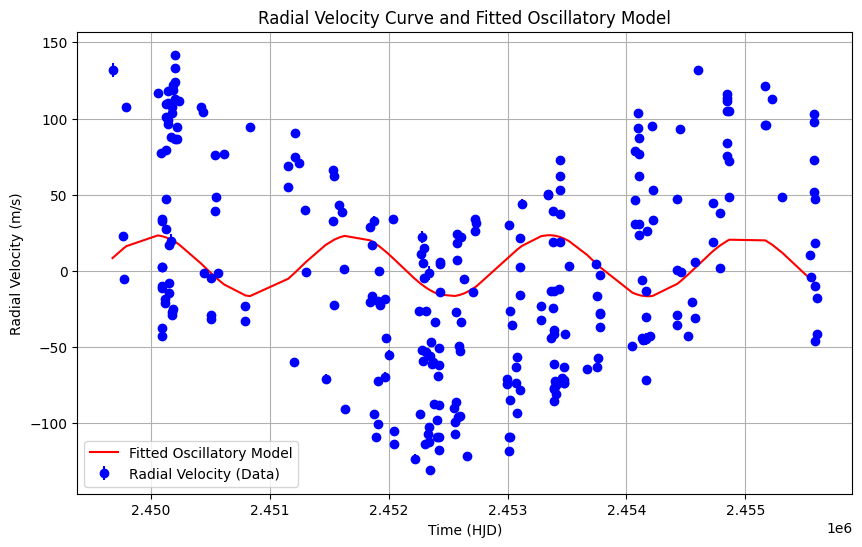

In [11]:
# Creating the plot
plt.figure(figsize=(10,6))

# plotting the radial velocity with error bars 
plt.errorbar(time, rv, yerr=uncertainty, fmt='o', color='blue', label='Radial Velocity (Data)')

# generating the fitted model using optimal parameters 
model = oscillatory_model(time, *popt)

#ploting the fitted oscillatory model 
plt.plot(time, model, color='red', label='Fitted Oscillatory Model')

# Adding labels and a title

plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity Curve and Fitted Oscillatory Model')

# adding grid and legend 

plt.grid(True)
plt.legend()


#Save plot as a pdf
plt.savefig('radial_velocity_curve.pdf', format='pdf')


#show plot
plt.show()
